#### Objective:
    To build a regression model which can predict the price of the house based on the given factors.
    As these factors may or may not be the best factors to predict the pricing of the house thereby it is
    also required to keep only keep the ones, which are truelly related.
    
#### Steps:
    1. Read the data and understand the structure of the columns and data.
    2. clean the data.
        - fill the values
        - remove the invalid data.
        - correct the type of columns
    3. Find the relation with the data using correlation matrix / Heatmap
    4. 

#### Import the required libraries

In [58]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

#### Import the data provided for housing dataset

In [59]:
housing_df = pd.read_csv("train.csv")
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

#### understand the columns and data available

In [60]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### segregate attributes into various segments.
 1. Based on the data type (numberical or categorical)
 2. Based on any cluster parameters (If possible)

In [61]:
numerical_columns = ["LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd",  "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]
categorical_columns = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "MasVnrArea", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "MoSold", "YrSold", "SaleType", "SaleCondition"]

### get different values for categorical columns

In [62]:
for col in categorical_columns:
    print("Attribute Name: ", col, "\n", housing_df[col].value_counts(), "\n")

Attribute Name:  MSSubClass 
 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

Attribute Name:  MSZoning 
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

Attribute Name:  Street 
 Pave    1454
Grvl       6
Name: Street, dtype: int64 

Attribute Name:  Alley 
 Grvl    50
Pave    41
Name: Alley, dtype: int64 

Attribute Name:  LotShape 
 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

Attribute Name:  LandContour 
 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 

Attribute Name:  Utilities 
 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 

Attribute Name:  LotConfig 
 Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

Attribute Name:  LandSlope 
 

### get distinct value counts for numberical columns

In [63]:
for col in numerical_columns:
    print("Attribute Name: ", col, "\n", housing_df[col].value_counts(), "\n")

Attribute Name:  LotFrontage 
 60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64 

Attribute Name:  LotArea 
 7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64 

Attribute Name:  OverallQual 
 5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64 

Attribute Name:  OverallCond 
 5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64 

Attribute Name:  YearBuilt 
 2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64 

Attribute Name:  YearRemodAdd 
 1950    178
2006     97
2007     76
20

### Sweetviz is helpful in AutoEDA

In [64]:
# Drop Id Column
housing_df.drop("Id", inplace=True, axis=1)

In [65]:
housing_df[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  BsmtFullBath   1460 non-null   int64  
 15  BsmtHalfBath   1460 non-null   int64  
 16  FullBath       1460 non-null   int64  
 17  HalfBath       1460 non-null   int64  
 18  BedroomA

In [66]:
housing_df[numerical_columns].describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082     6.099315     5.575342  1971.267808   
std      24.284752    9981.264932     1.382997     1.112799    30.202904   
min      21.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      59.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      69.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      80.000000   11601.500000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   443.639726    46.549315   567.240411  1057.429452  ...   
std       20.645407   456.098091   161.319273   441.866955   438.705324  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000   223.000000   795.750000  ...   
50%     1994.000000   383.500000     0.000000   477.500000   991.500000  ...   
75%     2004.000000   712.250000     0.000000   808.000000  1298.250000  ...   
max     2010.000000  5644.000000  1474.000000  2336.000000  6110.000000  ...   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2010.000000     4.000000  1418.000000   857.000000   547.000000   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  
count    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  
mean       21.954110     3.409589    15.060959     2.758904     43.489041  
std        61.119149    29.317331    55.757415    40.177307    496.123024  
min         0.000000     0.000000     0.000000     0.000000      0.000000  
25%         0.000000     0.000000     0.000000     0.000000      0.000000  
50%         0.000000     0.000000     0.000000     0.000000      0.000000  
75%         0.000000     0.000000     0.000000     0.000000      0.000000  
max       552.000000   508.000000   480.000000   738.000000  15500.000000  

[8 rows x 32 columns]

### # Get the correlation graph b/w the numberical values and the SalePrice

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

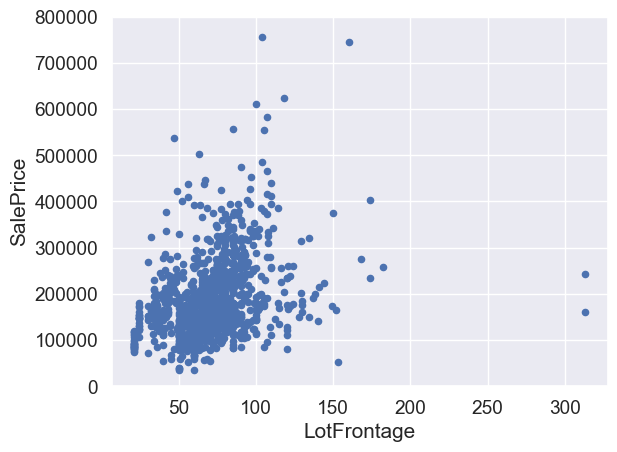

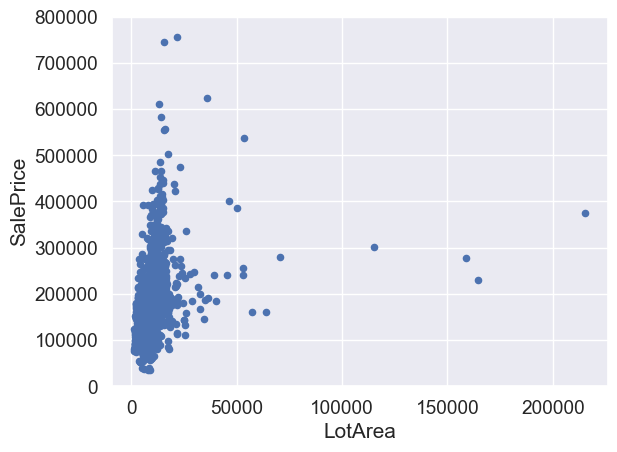

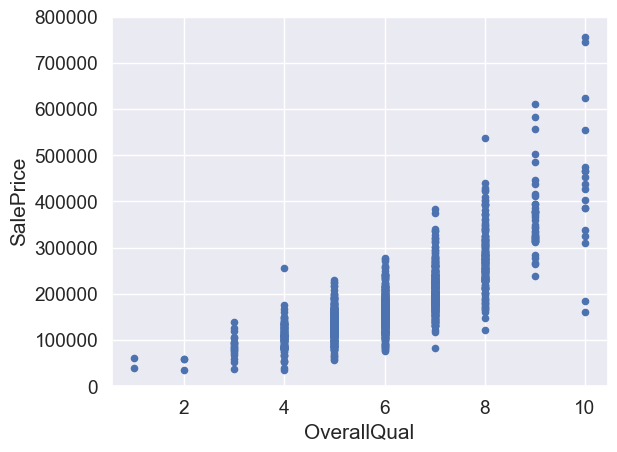

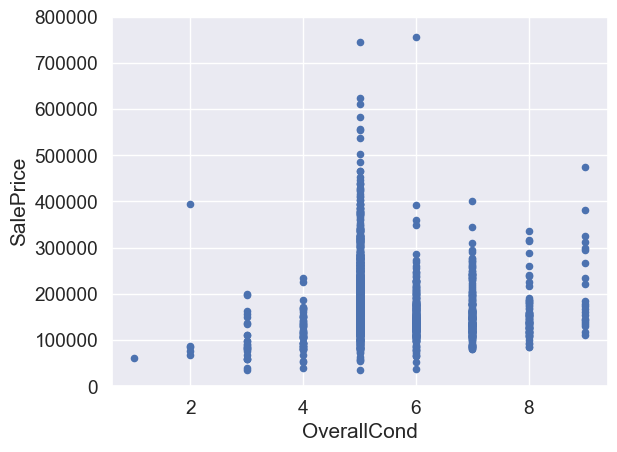

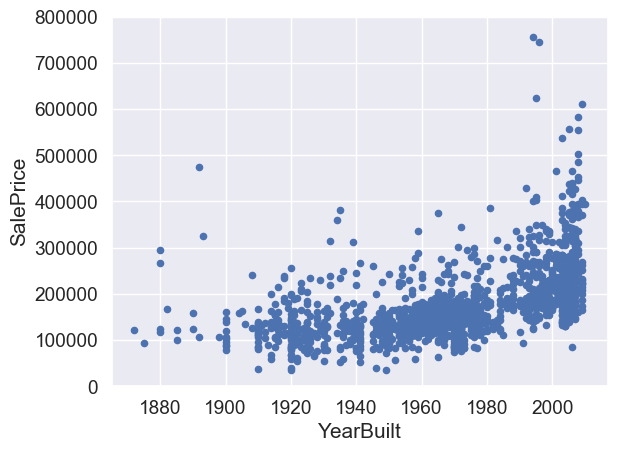

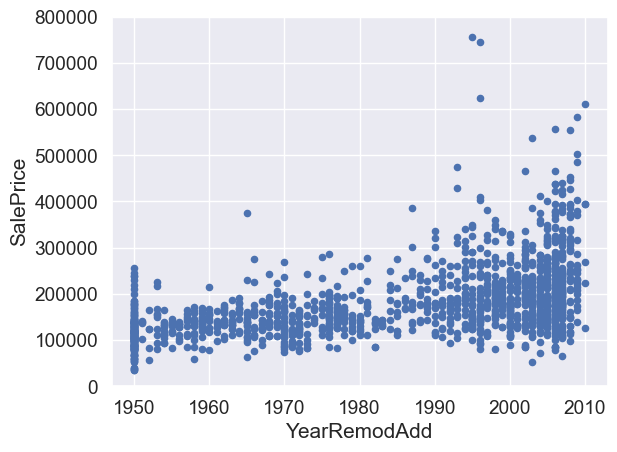

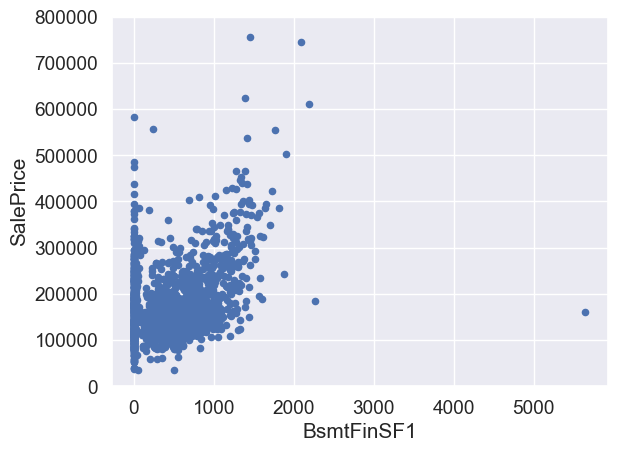

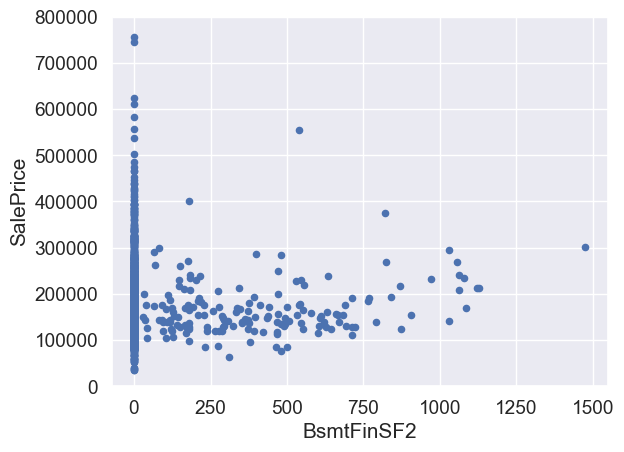

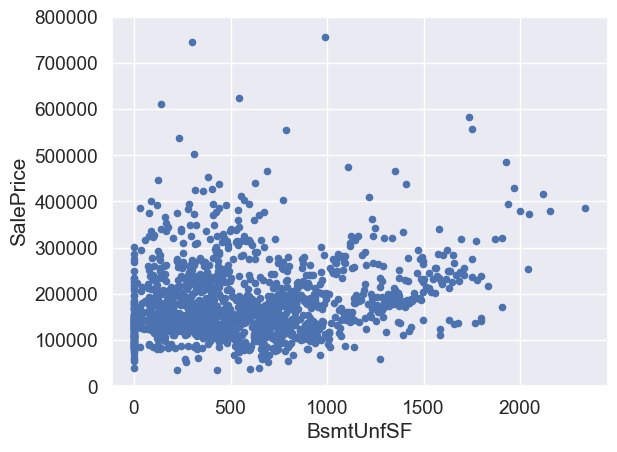

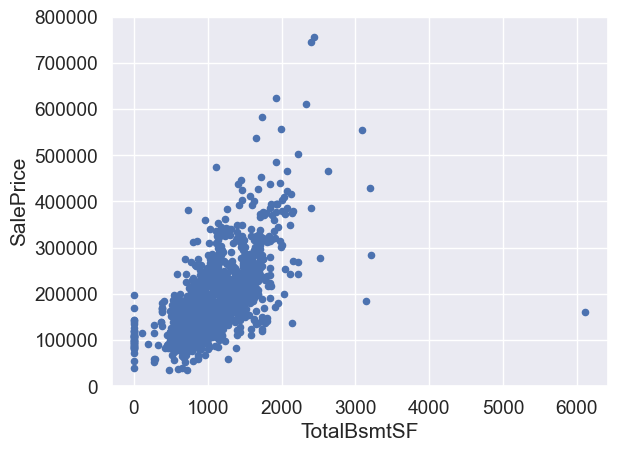

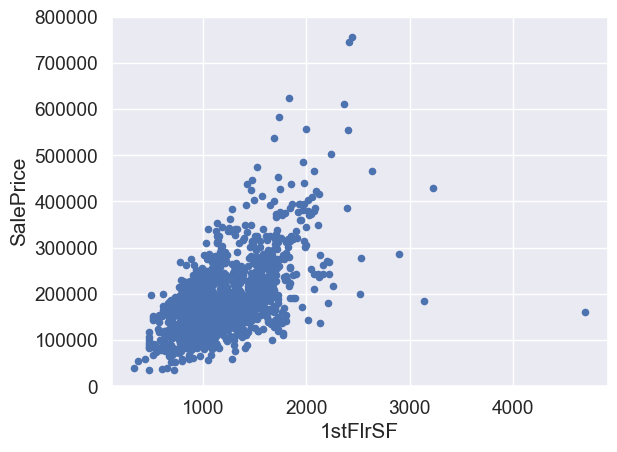

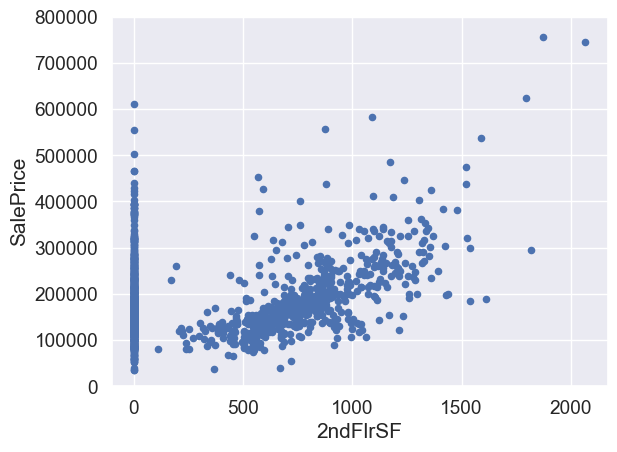

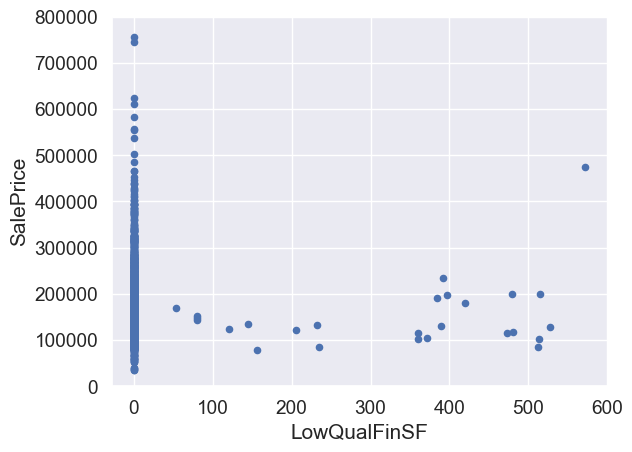

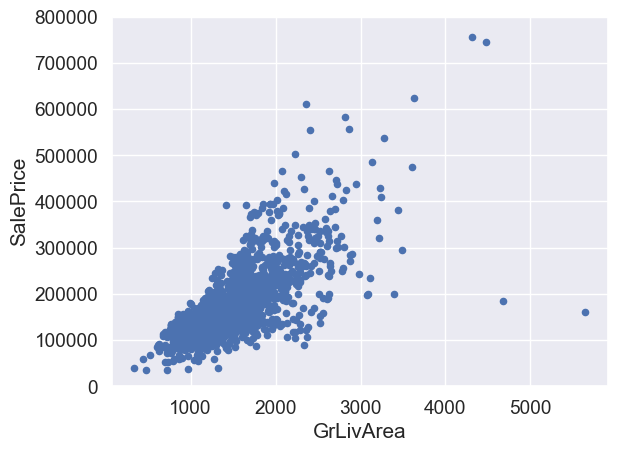

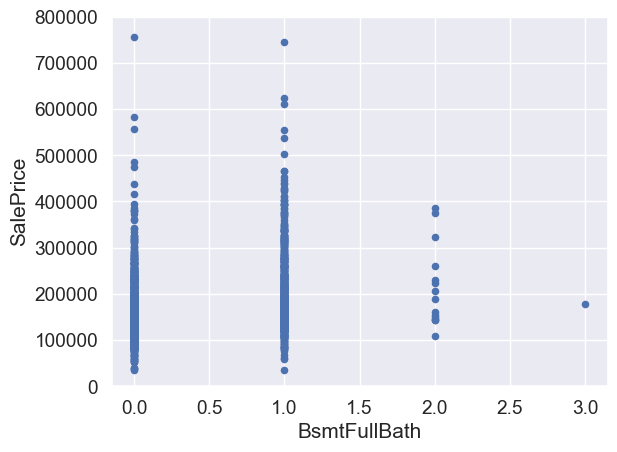

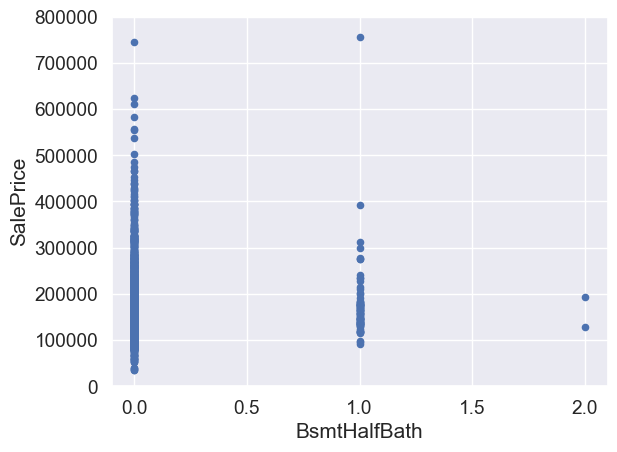

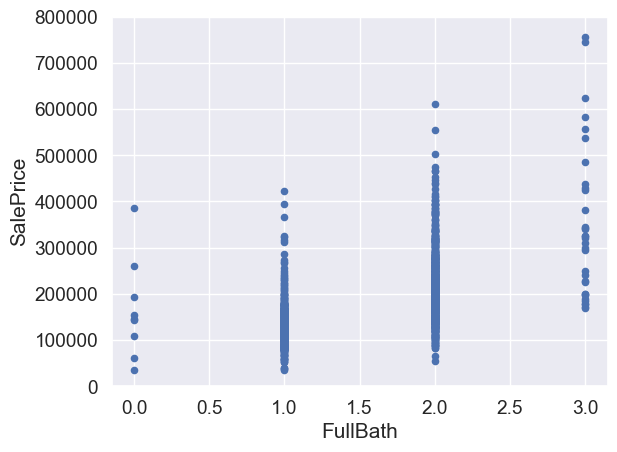

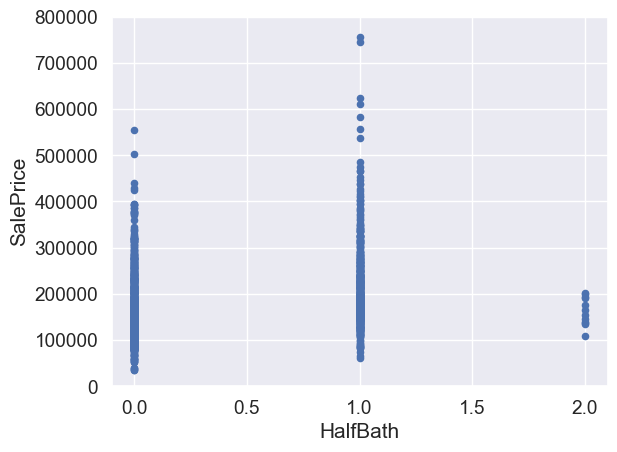

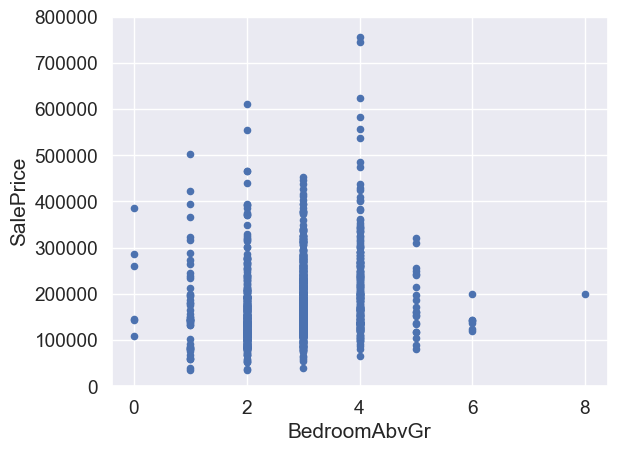

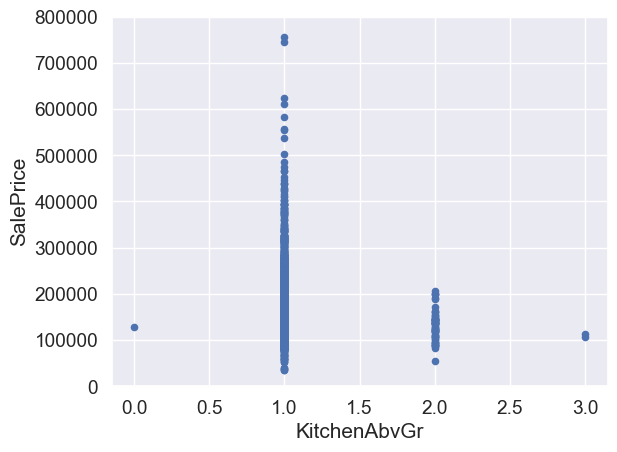

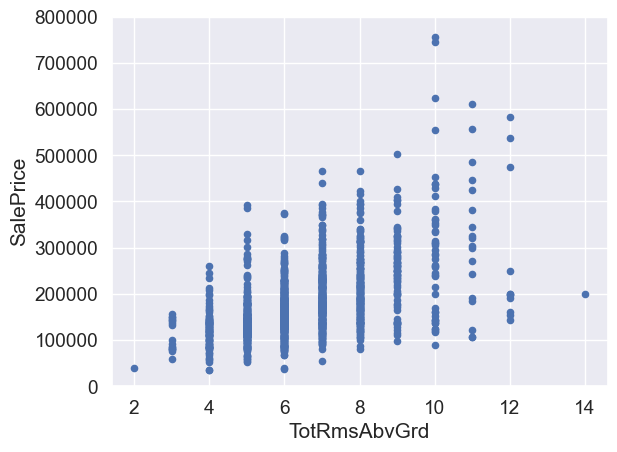

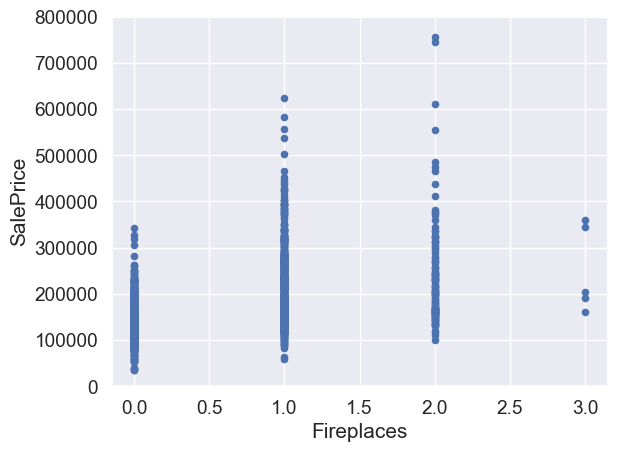

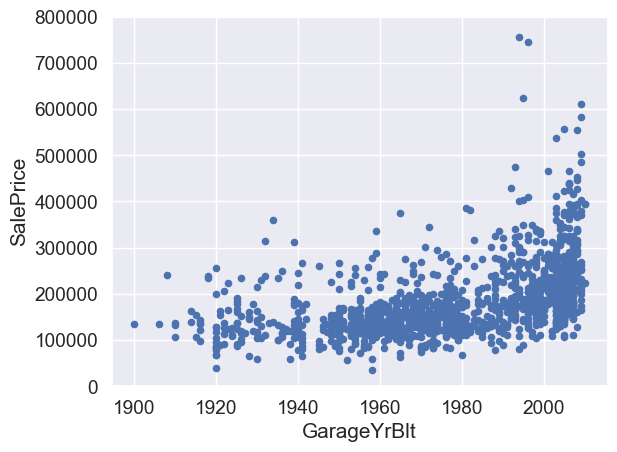

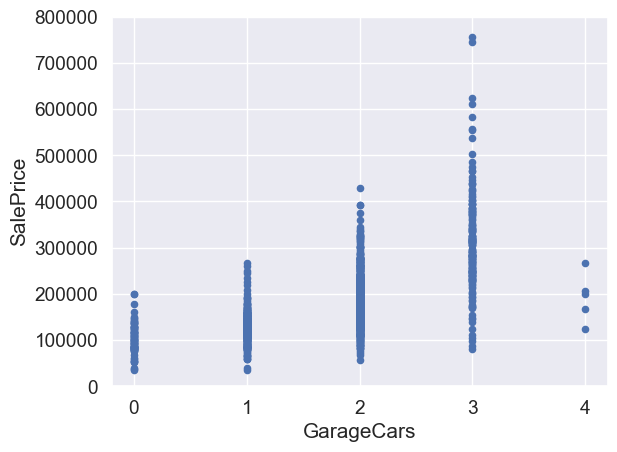

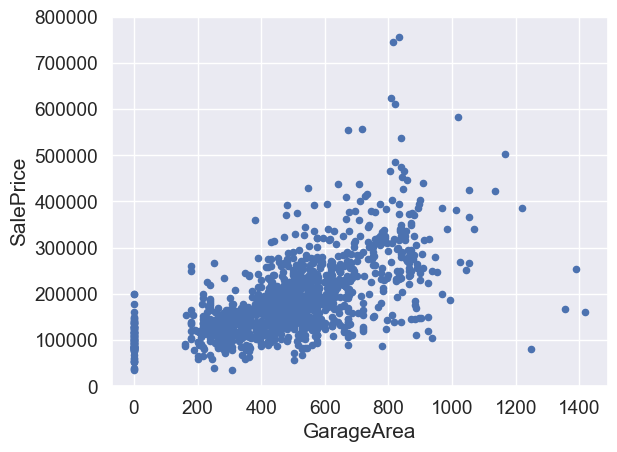

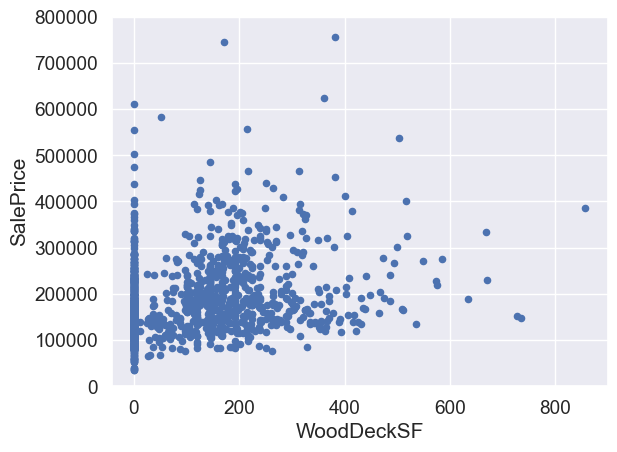

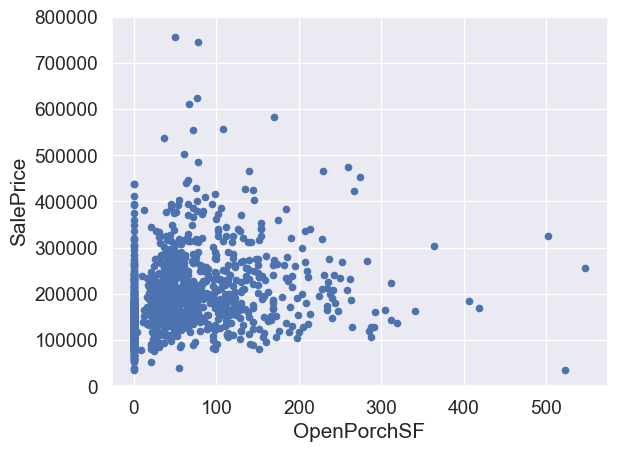

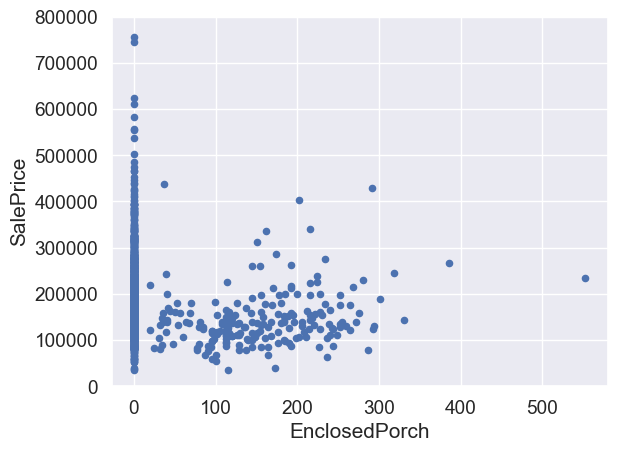

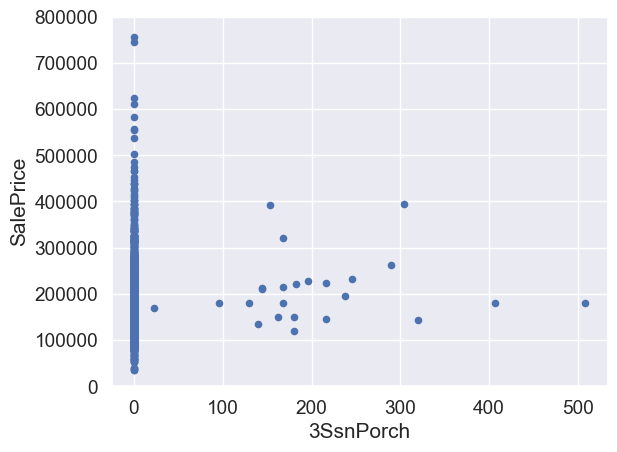

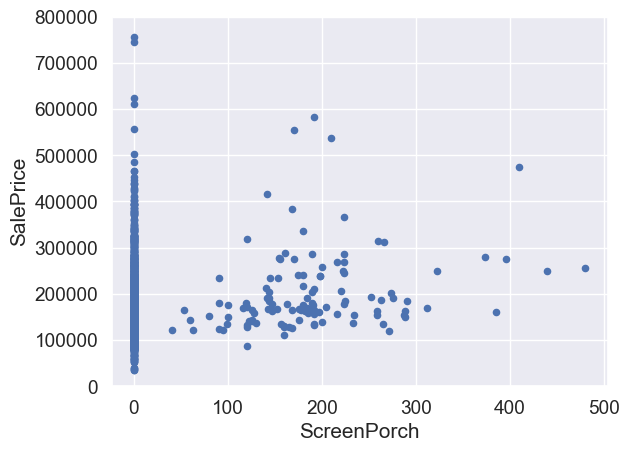

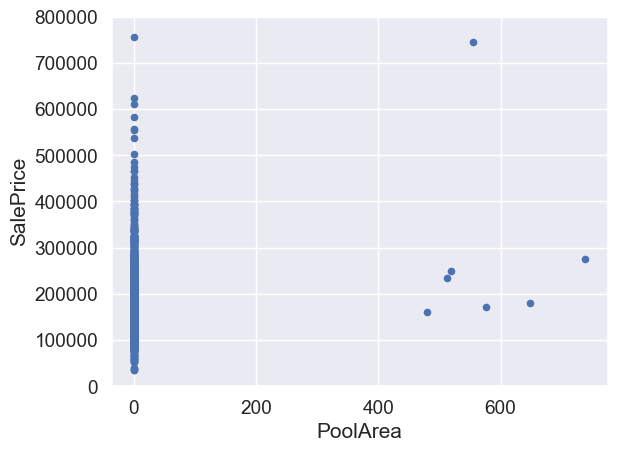

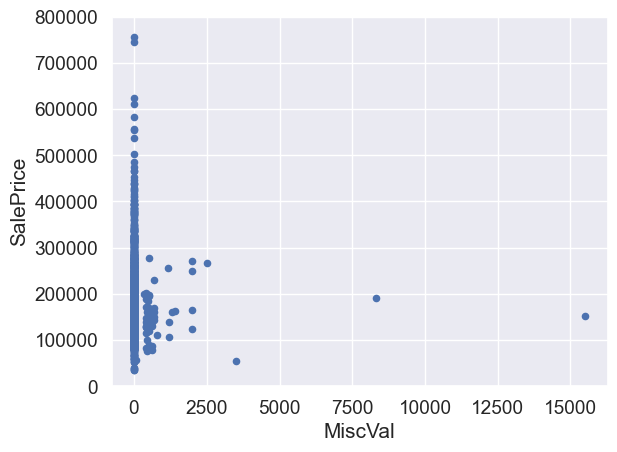

In [67]:

i = 0
for i in range(len(numerical_columns)):
#    plt.subplot(8, 4 , i+1)
    housing_df.plot.scatter(x=numerical_columns[i], y="SalePrice", ylim=(0,800000));
    i=i+1

### we can see that below values are directly proportional to the SalePrice
1. LotFrontage
2. LotArea
3. OverallQual
4. YearBuilt
5. YearRemodAdd
6. BsmtSF1
7. BsmtUnfSF
8. TotalBsmtSF
9. 1stFlrSF
10 2ndFlrSF
11. GrLivArea
12. FullBath
13. GarageYrBlt
14. GarageCars
15. GarageArea
16. WoodDeckSF
17. OpenPorchSF

###  get the correlation graph b/w the categorical values and the SalePrice

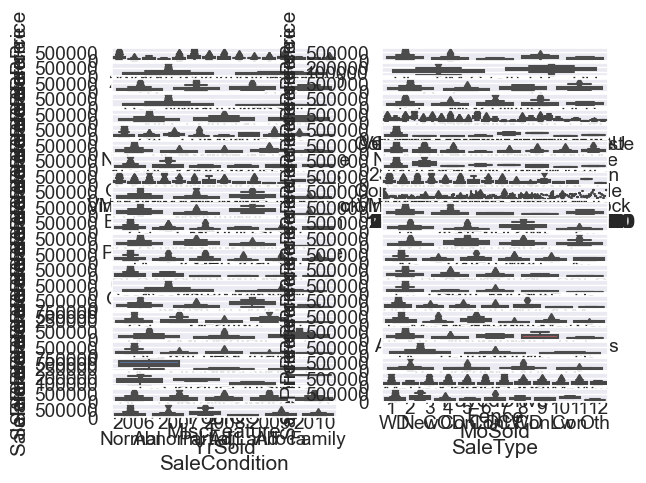

In [68]:
i = 0
for i in range(len(categorical_columns)):
    plt.subplot(24, 2, i+1)
    sns.boxplot(x=categorical_columns[i], y="SalePrice", data=housing_df);
    i=i+1
plt.show()

### Get the correlation values and print histogram

In [69]:
correlation = housing_df.corr()
print(correlation)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808   

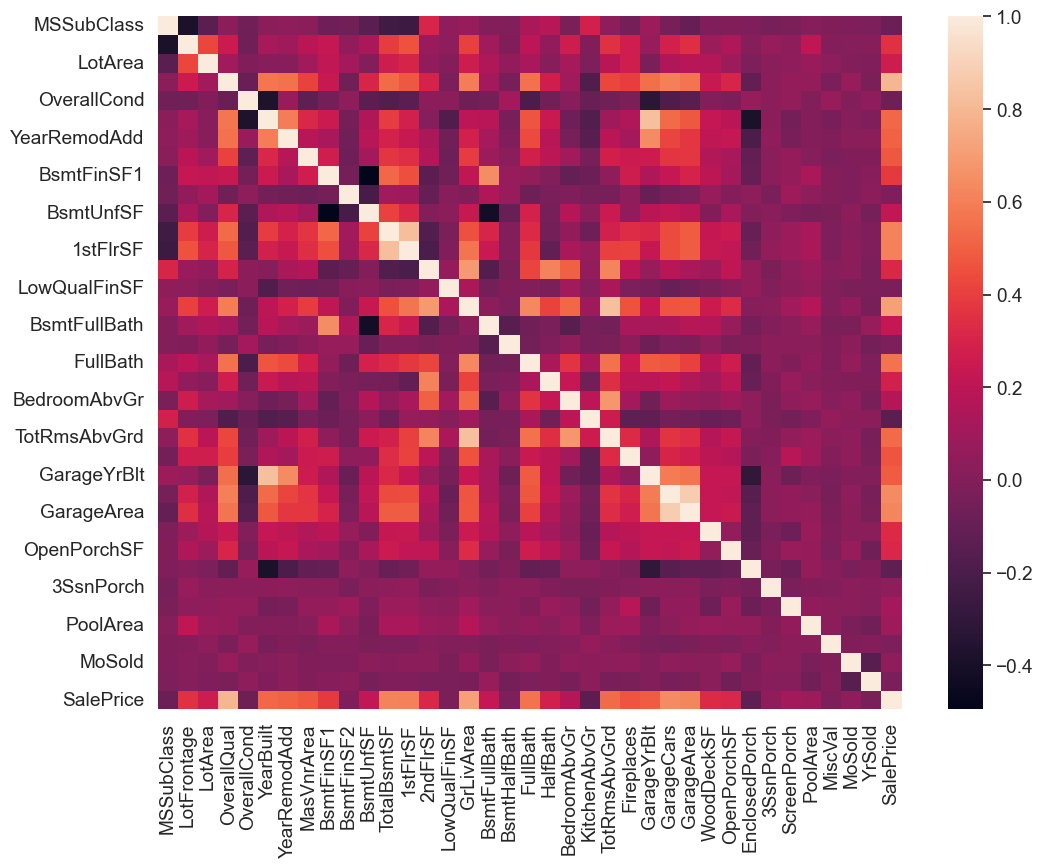

In [70]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation);

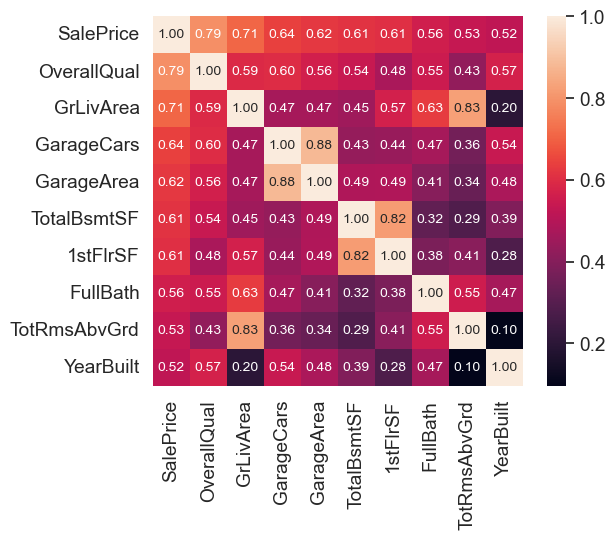

In [71]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Draw pairplot for the colums

/Users/kushala/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


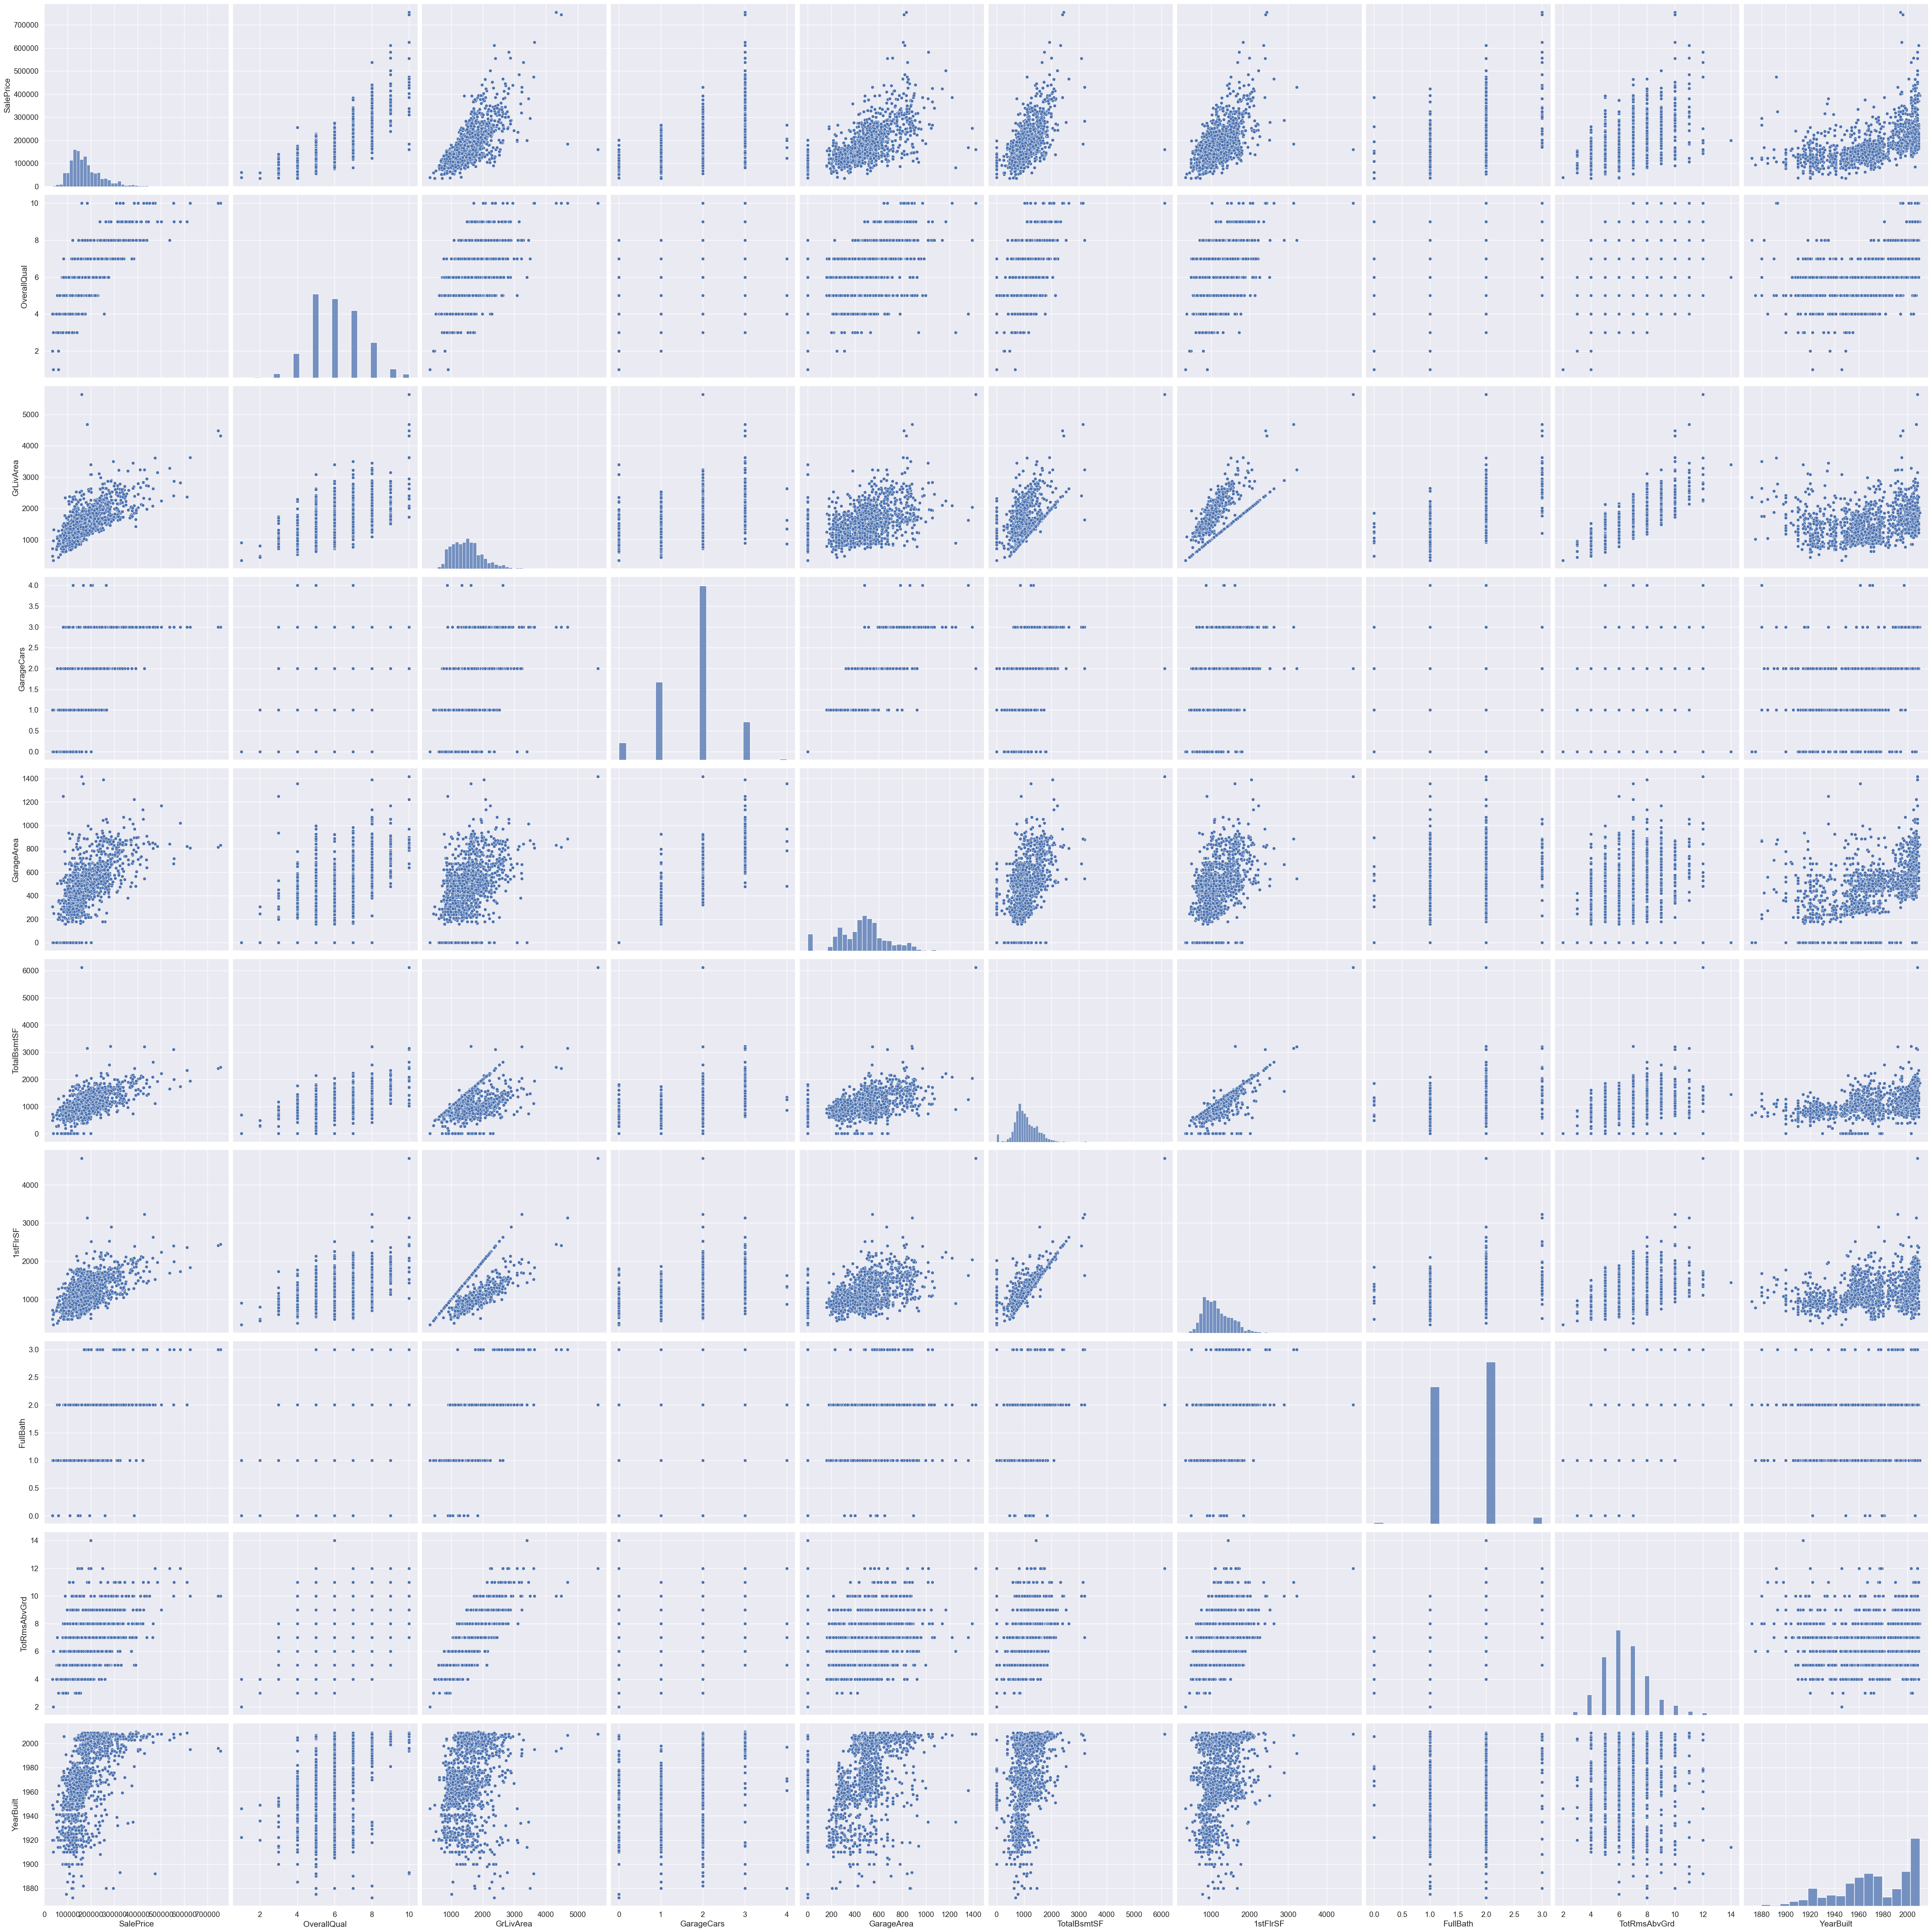

In [72]:
sns.pairplot(housing_df[cols], size=5)

## Handling missing values

1. Missing values in the categorical columns
    - there are values which are written as "NA" but those are not exactly null values but are legitimate values
    - there are few columns which are having the lsat 
2. Missing values in the numberical columns
 - fill it by median by default
 - if it can be filled by reference to any other column

In [73]:
#you can find these features on the description data file provided

null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_has_meaning:
    housing_df[i].fillna("Not Applicable", inplace=True)

In [74]:
# get the columns which have maximum number of empty values.
total = housing_df.isnull().sum().sort_values(ascending=False)
percent = (housing_df.isnull().sum()/housing_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Null Values', 'Percent'])
missing_data.head(6)

Total Null Values   Percent
LotFrontage                259  0.177397
GarageYrBlt                 81  0.055479
MasVnrArea                   8  0.005479
MasVnrType                   8  0.005479
Electrical                   1  0.000685
GrLivArea                    0  0.000000

In [75]:
# Drop the LotFrontage column
housing_df.drop("LotFrontage", axis=1, inplace=True)

In [76]:
housing_df["GarageYrBlt"].fillna(housing_df["GarageYrBlt"].median(), inplace=True)
housing_df["MasVnrArea"].fillna(housing_df["MasVnrArea"].median(), inplace=True)
housing_df["MasVnrType"].fillna("None", inplace=True)

In [77]:
total = housing_df.isnull().sum().sort_values(ascending=False)
percent = (housing_df.isnull().sum()/housing_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total   Percent
Electrical        1  0.000685
GarageCars        0  0.000000
GarageFinish      0  0.000000
GarageYrBlt       0  0.000000
GarageType        0  0.000000

In [78]:
housing_df.dropna(inplace=True)

/Users/kushala/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

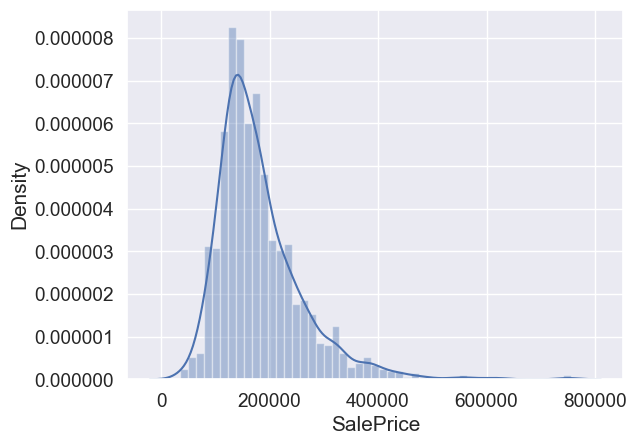

In [79]:
sns.distplot(housing_df["SalePrice"])

/Users/kushala/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

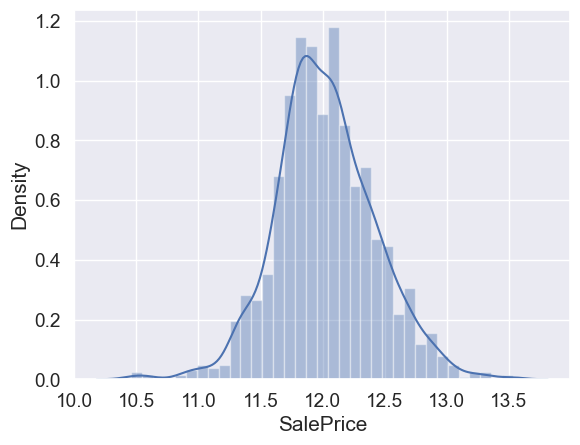

In [80]:
sns.distplot(np.log(housing_df["SalePrice"]))

In [81]:
housing_df["TransformedPrice"] = np.log(housing_df["SalePrice"])

In [82]:
types_train = housing_df.dtypes #type of each feature in data: int, float, object
numerical_col = types_train[(types_train == 'int64') | (types_train == float)].index
categorical_col = types_train[types_train == object].index

In [83]:
print(numerical_col)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'TransformedPrice'],
      dtype='object')


In [84]:
print(categorical_col)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [85]:
for i in categorical_col:
    feature_set = set(housing_df[i])
    for j in feature_set:
        feature_list = list(feature_set)
        housing_df.loc[housing_df[i] == j, i] = feature_list.index(j)

In [86]:
X = housing_df.drop(["SalePrice", "TransformedPrice"], axis=1).values
y = housing_df["TransformedPrice"].values

In [87]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [88]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9103977528238428
Testing R2
0.6732942345837483


In [89]:
# list of alphas to tune
params = {'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100 ]}

In [90]:
# create Ridge Regression
ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/kushala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.47521e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/kushala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.58963e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/kushala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.97953e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/kushala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.65821e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/kushala/opt/anaconda3

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.005474      0.000957         0.001050        0.000146         0.0   
1       0.003919      0.000893         0.000973        0.000082         0.0   
2       0.003482      0.000463         0.001096        0.000219    0.000001   
3       0.003290      0.000451         0.000929        0.000079     0.00001   
4       0.003216      0.000209         0.000976        0.000151      0.0001   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-08}           0.918957           0.881104           0.806591   
1   {'alpha': 1e-07}           0.918957           0.881104           0.806591   
2   {'alpha': 1e-06}           0.918957           0.881104           0.806591   
3   {'alpha': 1e-05}           0.918957           0.881104           0.806591   
4  {'alpha': 0.0001}           0.918956           0.881105           0.806592   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.150457  ...         0.722151        0.288185               30   
1           0.150541  ...         0.722167        0.288152               29   
2           0.151376  ...         0.722334        0.287820               28   
3           0.159669  ...         0.723993        0.284530               27   
4           0.237190  ...         0.739497        0.253812               26   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.904569            0.913294            0.931181   
1            0.904569            0.913294            0.931181   
2            0.904569            0.913294            0.931181   
3            0.904569            0.913294            0.931181   
4            0.904569            0.913294            0.931181   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.908383            0.909259          0.913337         0.009343  
1            0.908383            0.909259          0.913337         0.009343  
2            0.908383            0.909259          0.913337         0.009343  
3            0.908383            0.909259          0.913337         0.009343  
4            0.908383            0.909259          0.913337         0.009343  

[5 rows x 21 columns]

In [91]:
print(model_cv.best_estimator_, model_cv.best_index_, model_cv.best_params_, model_cv.best_score_)

Ridge(alpha=0.01) 6 {'alpha': 0.01} 0.8636465940418381


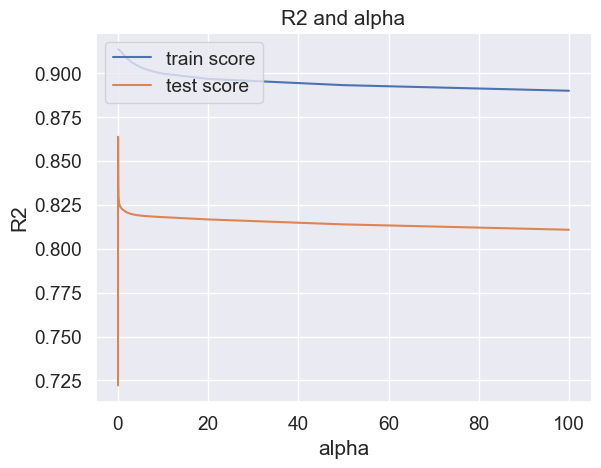

In [92]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### we can see that the best score is found at almost 0 and accuracy is around 80% 

###  let's try for LASSO regression as well with the same alpha values

In [93]:
# create Ridge Regression
lasso = Lasso()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/kushala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.379e+00, tolerance: 1.392e-02
  model = cd_fast.enet_coordinate_descent(
/Users/kushala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.379e+00, tolerance: 1.392e-02
  model = cd_fast.enet_coordinate_descent(
/Users/kushala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.013851      0.008400         0.001391        0.000198         0.0   
1       0.012407      0.007843         0.001117        0.000226         0.0   
2       0.016474      0.010876         0.001155        0.000185    0.000001   
3       0.013763      0.009328         0.001243        0.000274     0.00001   
4       0.008921      0.002382         0.001337        0.000238      0.0001   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-08}           0.918957           0.881105           0.806591   
1   {'alpha': 1e-07}           0.918957           0.881105           0.806592   
2   {'alpha': 1e-06}           0.918960           0.881111           0.806601   
3   {'alpha': 1e-05}           0.918993           0.881161           0.806689   
4  {'alpha': 0.0001}           0.919127           0.881496           0.807434   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.663292  ...         0.824718        0.088639                6   
1           0.671518  ...         0.826366        0.085654                4   
2           0.746029  ...         0.841297        0.060088                1   
3           0.716154  ...         0.835612        0.070017                2   
4           0.651640  ...         0.825327        0.093992                5   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.904569            0.913294            0.931181   
1            0.904569            0.913294            0.931181   
2            0.904569            0.913294            0.931181   
3            0.904568            0.913292            0.931180   
4            0.904455            0.913184            0.931057   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.908367            0.909259          0.913334         0.009345  
1            0.908366            0.909259          0.913334         0.009345  
2            0.908358            0.909259          0.913332         0.009346  
3            0.908186            0.909259          0.913297         0.009364  
4            0.908074            0.909207          0.913195         0.009355  

[5 rows x 21 columns]

In [94]:
print(model_cv.best_estimator_, model_cv.best_index_, model_cv.best_params_, model_cv.best_score_)

Lasso(alpha=1e-06) 2 {'alpha': 1e-06} 0.8412972043328711


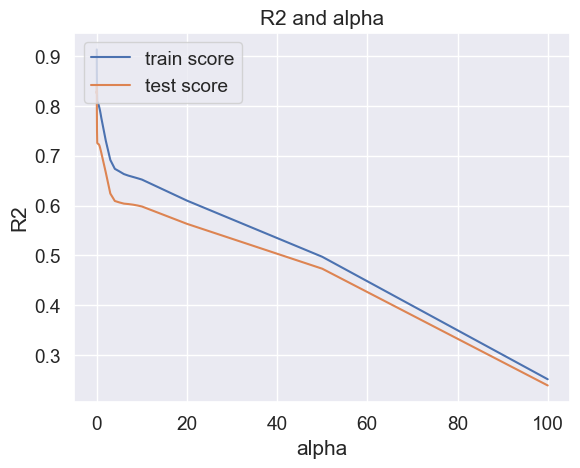

In [95]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### let's reduce the alpha value to smaller number

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/kushala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.379e+00, tolerance: 1.392e-02
  model = cd_fast.enet_coordinate_descent(
/Users/kushala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.379e+00, tolerance: 1.392e-02
  model = cd_fast.enet_coordinate_descent(
/Users/kushala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

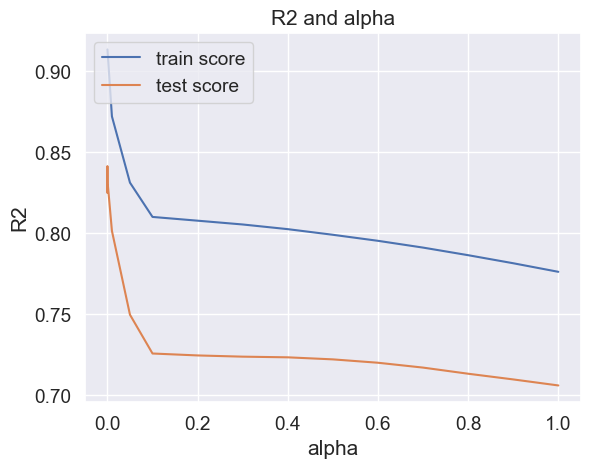

In [98]:
params = {'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
# create Ridge Regression
lasso = Lasso()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [99]:
print(model_cv.best_estimator_, model_cv.best_index_, model_cv.best_params_, model_cv.best_score_)

Lasso(alpha=1e-06) 2 {'alpha': 1e-06} 0.8412972043328711


### Improvements which can be done in the model
1. dummy columns can be created for the categorical columns.
2. Post converting the SalePrice to logarithmic scale, we can again check the relation of SalePrice and other columns. As well converting the other Attributes values to other corresponding funtion.
2. More accuracy can be brought by handling the columns. Such as by adding the weightage to the categorical colums.
3. Model can again be refined for colinearity by manual intervention}


In [100]:
# Drop the top 5 related attributes

In [111]:
lasso = Lasso(alpha=0.00001)
lasso.fit(X_train, y_train)
list(zip(housing_df.columns, lasso.coef_))

[('MSSubClass', -0.0002688480886276215),
 ('MSZoning', -0.008159022575616263),
 ('LotArea', 2.0274715231456484e-06),
 ('Street', 0.1588253841890899),
 ('Alley', 0.013757128374589915),
 ('LotShape', 0.004613055809563553),
 ('LandContour', -0.009288549523987992),
 ('Utilities', 0.1406996867364145),
 ('LotConfig', 0.003941726739435965),
 ('LandSlope', 0.0016317586238704734),
 ('Neighborhood', -0.001322241257443947),
 ('Condition1', -0.0068175821459489205),
 ('Condition2', -0.01876978250376544),
 ('BldgType', 0.01853609686908631),
 ('HouseStyle', 0.001246942870244691),
 ('OverallQual', 0.0619051459915152),
 ('OverallCond', 0.04821929578034765),
 ('YearBuilt', 0.0019139511948132097),
 ('YearRemodAdd', 0.0010532009022036848),
 ('RoofStyle', -0.0033451770497453875),
 ('RoofMatl', 0.004248898389068024),
 ('Exterior1st', -0.006373895215932031),
 ('Exterior2nd', 0.003964998255124773),
 ('MasVnrType', -0.0002317145940001833),
 ('MasVnrArea', 3.457961310145905e-05),
 ('ExterQual', -0.0014048652788

In [109]:
print(housing_df.columns)

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Ope